# Paso 4. Análisis exploratorio de datos (Python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Cargar los archivos CSV usando las rutas correctas
project_sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
project_sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
project_sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Mostrar las primeras filas de cada dataframe para inspeccionar los datos
print(project_sql_result_01.head())
print(project_sql_result_04.head())
print(project_sql_result_07.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [3]:
# Información del DataFrame project_sql_result_01
print(project_sql_result_01.info())
print()
# Información del DataFrame project_sql_result_04
print(project_sql_result_04.info())
print()
# Información del DataFrame project_sql_result_07
print(project_sql_result_07.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

In [4]:
# Verificar valores nulos y duplicados en project_sql_result_01
print("Valores nulos en project_sql_result_01:\n", project_sql_result_01.isnull().sum())
print("Valores duplicados en project_sql_result_01:", project_sql_result_01.duplicated().sum())

# Verificar valores nulos y duplicados en project_sql_result_04
print("Valores nulos en project_sql_result_04:\n", project_sql_result_04.isnull().sum())
print("Valores duplicados en project_sql_result_04:", project_sql_result_04.duplicated().sum())

# Verificar valores nulos y duplicados en project_sql_result_07
print("Valores nulos en project_sql_result_07:\n", project_sql_result_07.isnull().sum())

Valores nulos en project_sql_result_01:
 company_name    0
trips_amount    0
dtype: int64
Valores duplicados en project_sql_result_01: 0
Valores nulos en project_sql_result_04:
 dropoff_location_name    0
average_trips            0
dtype: int64
Valores duplicados en project_sql_result_04: 0
Valores nulos en project_sql_result_07:
 start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [10]:
# Asegurarse de que la columna 'start_ts' esté en formato datetime
project_sql_result_07['start_ts'] = pd.to_datetime(project_sql_result_07['start_ts'])

In [11]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
# Ordenar por average_trips y obtener los 10 principales barrios
top_10_neighborhoods = project_sql_result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


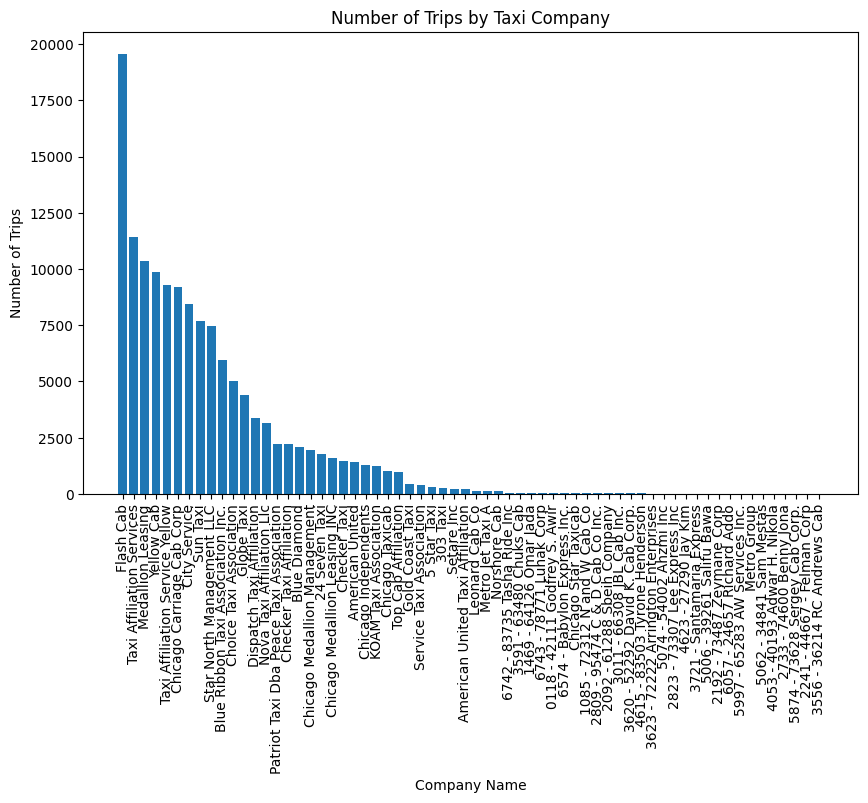

In [12]:
# Gráfico de empresas de taxis y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(project_sql_result_01['company_name'], project_sql_result_01['trips_amount'])
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Taxi Company')
plt.show()

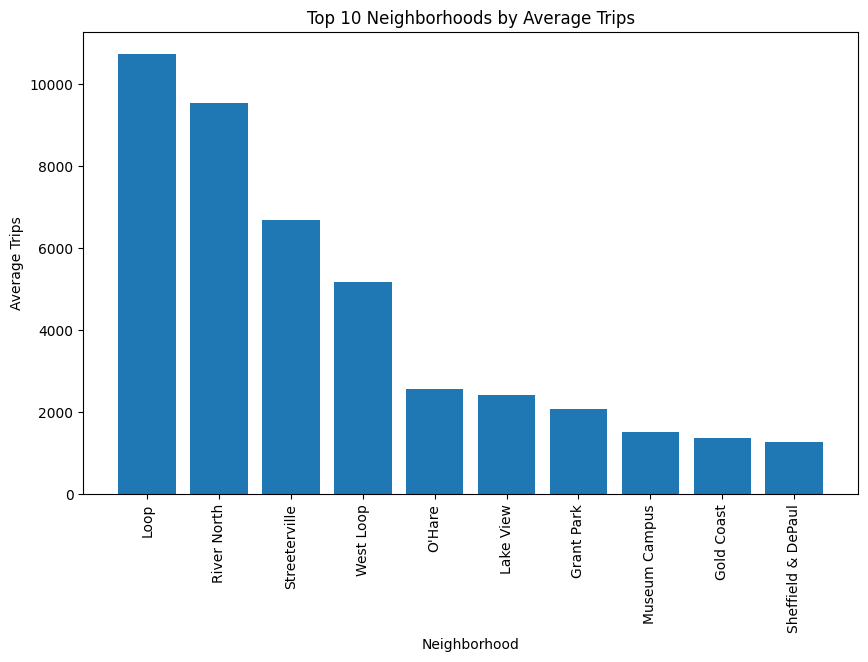

In [13]:
# Seleccionar los 10 barrios principales
top_10_neighborhoods = project_sql_result_04.sort_values(by='average_trips', ascending=False).head(10)

# Gráfico de los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Trips')
plt.title('Top 10 Neighborhoods by Average Trips')
plt.show()

Gráfico de empresas de taxis y número de viajes
Empresas de Taxis y Número de Viajes:
Las compañías de taxis más populares el 15 y 16 de noviembre de 2017 fueron Flash Cab y Taxi Affiliation Services, con Flash Cab dominando claramente con alrededor de 19,558 viajes.
Hay una distribución desigual de los viajes entre las diferentes compañías de taxis, con algunas empresas dominando el mercado. Vemos que después de las primeras dos compañías, el número de viajes disminuye considerablemente.
Varias compañías tienen un número mucho menor de viajes en comparación con las principales.
Gráfico de los 10 barrios principales por número de finalizaciones
Top 10 Barrios por Número de Finalizaciones:
Los barrios con más viajes finalizados en noviembre de 2017 fueron Loop y River North, con Loop teniendo un promedio de aproximadamente 10,727.47 viajes y River North con 9,523.67 viajes.
Estos barrios son probablemente áreas comerciales y de negocios importantes en Chicago, lo que explica la alta cantidad de viajes que terminan allí.
Otros barrios en el top 10 incluyen Streeterville, West Loop y O'Hare, que también son áreas de alto tráfico, posiblemente debido a la presencia de oficinas, restaurantes y el aeropuerto.

# Paso 5: Prueba de hipótesis

Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
Planteamiento de la hipótesis:

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
Decidir el nivel de significación (alfa):

Nivel de significación: 0.05

In [14]:
# Separar los datos en dos grupos: sábados lluviosos y sábados no lluviosos
rainy_saturdays = project_sql_result_07[(project_sql_result_07['weather_conditions'] == 'Bad') & (project_sql_result_07['start_ts'].dt.weekday == 5)]
non_rainy_saturdays = project_sql_result_07[(project_sql_result_07['weather_conditions'] == 'Good') & (project_sql_result_07['start_ts'].dt.weekday == 5)]

# Calcular la duración promedio para cada grupo
mean_duration_rainy = rainy_saturdays['duration_seconds'].mean()
mean_duration_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

# Prueba t para comparar las medias de los dos grupos
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False)

# Mostrar los resultados
print(f"Duración promedio (sábados lluviosos): {mean_duration_rainy} segundos")
print(f"Duración promedio (sábados no lluviosos): {mean_duration_non_rainy} segundos")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Decisión basada en el p-value
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: La duración promedio de los viajes no cambia los sábados lluviosos.")

Duración promedio (sábados lluviosos): 2427.2055555555557 segundos
Duración promedio (sábados no lluviosos): 1999.6756756756756 segundos
t-statistic: 7.186034288068629, p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados lluviosos.


Conclusiones basadas en los resultados del análisis de la hipótesis
Duración Promedio de los Viajes:

La duración promedio de los viajes los sábados lluviosos es aproximadamente 2427.21 segundos.
La duración promedio de los viajes los sábados no lluviosos es aproximadamente 1999.68 segundos.
Resultados de la Prueba T:

El valor t obtenido es 7.186, lo que indica una diferencia significativa entre las dos medias.
El valor p es 6.738994326108734e-12, que es mucho menor que el nivel de significación establecido (0.05).
Decisión:

Dado que el valor p es significativamente menor que 0.05, rechazamos la hipótesis nula.
Esto sugiere que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare realmente cambia los sábados lluviosos.
Explicación de los resultados
Cómo se plantearon las hipótesis:

La hipótesis nula (H0) asume que no hay diferencia en la duración promedio de los viajes entre sábados lluviosos y no lluviosos.
La hipótesis alternativa (H1) asume que hay una diferencia en la duración promedio de los viajes entre sábados lluviosos y no lluviosos.
Criterio utilizado para probar las hipótesis:

Se utilizó la prueba t para comparar las medias de dos muestras independientes. Este método es adecuado para comparar las medias de dos grupos diferentes y determinar si la diferencia entre ellas es estadísticamente significativa.
Conclusiones:

Los resultados muestran una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y no lluviosos.
Los viajes los sábados lluviosos tienden a durar más tiempo en comparación con los sábados no lluviosos, lo cual es consistente con la expectativa de que las condiciones meteorológicas adversas pueden afectar la duración de los viajes.